# Random Forest

In [243]:
import pandas as pd
import numpy as np
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Load previously prepared data

In [244]:
df = pd.read_csv('data/laptop_train.csv')

In [245]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,log_price
0,Dell,Inspiron 3567,Notebook,15.6,Intel Core i3 7100U,6,Intel HD Graphics 620,Windows 10,2.30,1366x768,NaN,False,2.4,1000.0,HDD,0.0,NaN,6.129050
1,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i5 7300HQ,8,Nvidia GeForce GTX 1050,Windows 10,2.50,1920x1080,IPSPanel,False,2.5,256.0,SSD,0.0,NaN,6.720220
2,Dell,XPS 13,Ultrabook,13.3,Intel Core i7 8550U,8,Intel UHD Graphics 620,Windows 10,1.20,1920x1080,NaN,False,1.8,256.0,SSD,0.0,NaN,7.364547
3,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,Intel Core M 6Y30,8,Intel HD Graphics 515,Windows 10,1.20,1920x1080,IPSPanel,False,0.9,512.0,SSD,0.0,NaN,6.591674
4,Dell,Inspiron 3567,Notebook,15.6,Intel Core i3 6006U,4,AMD Radeon R5 M430,Linux,2.25,1366x768,NaN,False,2.0,1000.0,HDD,0.0,NaN,6.143370


In [246]:
df.columns

Index(['company', 'product', 'typename', 'inches', 'cpu', 'ram(GB)', 'gpu',
       'opsys', 'weight(kg)', 'resolution', 'screentype', 'touchscreen',
       'cpu(GHz)', 'memory_1_storage_gb', 'memory_1_type',
       'memory_2_storage_gb', 'memory_2_type', 'log_price'],
      dtype='object')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1132 non-null   object 
 1   product              1132 non-null   object 
 2   typename             1132 non-null   object 
 3   inches               1132 non-null   float64
 4   cpu                  1132 non-null   object 
 5   ram(GB)              1132 non-null   int64  
 6   gpu                  1132 non-null   object 
 7   opsys                1132 non-null   object 
 8   weight(kg)           1132 non-null   float64
 9   resolution           1132 non-null   object 
 10  screentype           301 non-null    object 
 11  touchscreen          1132 non-null   bool   
 12  cpu(GHz)             1132 non-null   float64
 13  memory_1_storage_gb  1132 non-null   float64
 14  memory_1_type        1132 non-null   object 
 15  memory_2_storage_gb  1132 non-null   f

In [248]:
target = "log_price"
numericFeatures = ["inches", "ram(GB)", "weight(kg)", "cpu(GHz)", "memory_1_storage_gb", "memory_2_storage_gb"]
catFeatures = ["company", "product", "typename", "cpu", "gpu", "opsys", "resolution", "screentype", "touchscreen", "memory_1_type", "memory_2_type"]

In [249]:
en = preprocessing.LabelEncoder()
for cols in catFeatures:
    df[cols] = en.fit_transform(df[cols])
print('Dataframe encoded by Label encoding dimension : ', df.shape)

Dataframe encoded by Label encoding dimension :  (1132, 18)


In [250]:
df

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,log_price
0,4,218,3,15.6,41,6,44,4,2.30,0,2,0,2.4,1000.0,1,0.0,3,6.129050
1,8,267,1,15.6,49,8,63,4,2.50,3,0,0,2.5,256.0,3,0.0,3,6.720220
2,4,525,4,13.3,69,8,51,4,1.20,3,2,0,1.8,256.0,3,0.0,3,7.364547
3,2,547,4,13.3,33,8,39,4,1.20,3,0,0,0.9,512.0,3,0.0,3,6.591674
4,4,218,3,15.6,39,4,19,1,2.25,0,2,0,2.0,1000.0,1,0.0,3,6.143370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,6,101,3,14.0,44,4,40,4,1.54,3,2,0,2.3,500.0,1,0.0,3,6.907755
1128,0,69,3,15.6,48,8,74,4,2.40,3,2,0,2.5,256.0,3,1000.0,0,6.683361
1129,6,26,3,15.6,61,8,44,4,2.04,0,2,0,2.7,2000.0,1,0.0,3,6.444131
1130,6,295,3,15.6,9,6,23,4,2.04,3,2,0,2.9,1000.0,2,0.0,3,6.309900


In [270]:
X=df.drop('log_price', axis = 1).values
y=df['log_price'].values

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [273]:
print("R2: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))


R2: 89.49 %


Result with default hyperparameters and without CV

## Hyperparameter tuning

In [181]:
features = df.columns.tolist()
features.remove(target)

In [274]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score


def CVTestRFClass(nFolds = 5, randomState=2023, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # empty lists to save thge results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    # Loop validating the model for each fold
    for train, test in kf.split(df.index.values):

        # Estimator
        clf = RandomForestRegressor(*args, **kwargs, random_state=randomState, n_jobs=-1)

        if debug:
            print(clf)
        # Training the model
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        predsTrain = clf.predict(df.iloc[train][features])
        preds = clf.predict(df.iloc[test][features])
        
        # Save predictions for this fold
        predictions.append(preds.tolist().copy())
        
        # with indexes
        indices.append(df.iloc[test].index.tolist().copy())
        
        # R2 measure
        trainScore = np.round(r2_score(df[target].iloc[train], predsTrain),4)*100
        testScore = np.round(r2_score(df[target].iloc[test], preds),4)*100
        
        # Save the results to the list
        trainResults.append(trainScore)
        testResults.append(testScore)

        if debug:
            print("Train R2: {:.2f} %".format(trainScore),
                  "Test R2: {:.2f} %".format(testScore))
        
    return trainResults, testResults, predictions, indices


In [275]:
trainResults, testResults, predictions, indices = CVTestRFClass(debug=True)
print("R2: {:.2f} %".format(np.mean(testResults)))

RandomForestRegressor(n_jobs=-1, random_state=2023)
Train R2: 98.67 % Test R2: 91.74 %
RandomForestRegressor(n_jobs=-1, random_state=2023)
Train R2: 98.76 % Test R2: 89.15 %
RandomForestRegressor(n_jobs=-1, random_state=2023)
Train R2: 98.62 % Test R2: 92.59 %
RandomForestRegressor(n_jobs=-1, random_state=2023)
Train R2: 98.72 % Test R2: 90.56 %
RandomForestRegressor(n_jobs=-1, random_state=2023)
Train R2: 98.69 % Test R2: 90.33 %
R2: 90.87 %


### Random search

In [213]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [217]:
import random

results = []

for k in range(100):

    params = {
        "max_depth" : random.randint(5, 40),
        "max_features" : random.randint(2, 17),
        "min_samples_split" : random.randint(2, 9),
    }
    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])
    
    # Estimate the model for randomized hyperparameters
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100,
                                                                    max_depth=params["max_depth"],
                                                                    max_features=params["max_features"],
                                                                    min_samples_split=params["min_samples_split"],
                                                                    min_samples_leaf=params["min_samples_leaf"])
    
    # Save the result
    results.append((np.mean(testResults), params.copy()))
    
    # Current iteration result
    print(params, np.mean(testResults))
    
    # Top 5 results each 10 iterations
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, params in sorted(results, key=lambda x: x[0], reverse=True)[0:5]:
            print(params, score)
        print()

{'max_depth': 37, 'max_features': 17, 'min_samples_split': 4, 'min_samples_leaf': 1} 90.77799999999999
{'max_depth': 29, 'max_features': 5, 'min_samples_split': 6, 'min_samples_leaf': 1} 91.388
{'max_depth': 37, 'max_features': 11, 'min_samples_split': 6, 'min_samples_leaf': 5} 89.778
{'max_depth': 31, 'max_features': 14, 'min_samples_split': 9, 'min_samples_leaf': 6} 89.054
{'max_depth': 23, 'max_features': 5, 'min_samples_split': 3, 'min_samples_leaf': 1} 91.75
{'max_depth': 7, 'max_features': 16, 'min_samples_split': 3, 'min_samples_leaf': 3} 88.00000000000001
{'max_depth': 15, 'max_features': 2, 'min_samples_split': 9, 'min_samples_leaf': 4} 87.99
{'max_depth': 21, 'max_features': 4, 'min_samples_split': 8, 'min_samples_leaf': 5} 88.72999999999999
{'max_depth': 14, 'max_features': 7, 'min_samples_split': 3, 'min_samples_leaf': 2} 91.194
{'max_depth': 20, 'max_features': 14, 'min_samples_split': 6, 'min_samples_leaf': 6} 89.054
{'max_depth': 12, 'max_features': 10, 'min_samples_spli

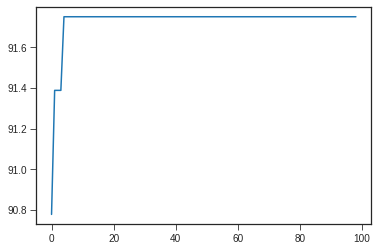

In [218]:
bestHistory = []
for k in range(1,len(results)):
    # List comprehension:
    bestHistory.append(np.max([x for x, y in sorted(results[:k], key=lambda x: x[0], reverse=True)]))
plt.plot(bestHistory)

In [224]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [225]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df[features], df[target])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [226]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [229]:
trainResults, testResults, predictions, indices = CVTestRFClass(
    n_estimators = 1400,
    min_samples_split = 5,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 80,
    bootstrap =  False,
    debug = True)
print("R2: {:.2f} %".format(np.mean(testResults)))

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400, n_jobs=-1,
                      random_state=2023)
Train R2: 99.25 % Test R2: 92.37 %
RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400, n_jobs=-1,
                      random_state=2023)
Train R2: 99.31 % Test R2: 90.56 %
RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400, n_jobs=-1,
                      random_state=2023)
Train R2: 99.24 % Test R2: 93.78 %
RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400, n_jobs=-1,
                      random_state=2023)
Train R2: 99.25 % Test R2: 92.83 %
RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_

Results after hyperparameter tuning are better than without it\
R2: 89.49 %
vs.
R2: 92.30 %

## Save the model

Let's save the model. I will later compare the performance of different models on the testing dataset

In [239]:
import pickle

In [237]:
model = RandomForestRegressor(n_estimators = 1400,
    min_samples_split = 5,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 80,
    bootstrap =  False)
model.fit(df[features], df[target])

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400)

In [240]:
pickle.dump(model, open('random_forest.sav', 'wb'))